In [1]:
from IPython.display import Image

## 통계적 언어 모델이 통계적인 접근 방법으로 어떻게 언어를 모델링 하는지 배워보자.

### 1. 조건부 확률

조건부 확률의 연쇄 법칙  
$P(x_1, x_2, x_3 ... x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)...P(x_n|x_1 ... x_{n-1})$  

예시
$P(A,B,C,D) = P(A)P(B|A)P(C|A,B)P(D|A,B,C)$

### 2. 문장에 대한 확률

문장 'An adorable little boy is spreading smiles'의 확률 $P(\text{An adorable little boy is spreading smiles})$를 식으로 표현해보자.  

각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어이다. 그리고 모든 단어로부터 하나의 문장이 완성된다.  

앞서 언급한 조건부 확률의 일반화 식을 문장의 확률 관점에서 다시 적어보면 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성된다.  
$P(w_1, w_2, w_3, w_4, w_5, ... w_n) = \prod_{n=1}^{n}P(w_{n} | w_{1}, ... , w_{n-1})$

위의 문장에 해당 식을 적용해보면 다음과 같다.

$P(\text{An adorable little boy is spreading smiles}) =$

$P(\text{An})  ×  P(\text{adorable|An})  ×  P(\text{little|An adorable})  ×  P(\text{boy|An adorable little})
         ×  P(\text{is|An adorable little boy})$

문장의 확률을 구하기 위해 각 단어에 대한 예측 확률들을 곱한다.

### 3. 카운트 기반의 접근

SLM은 이전 단어로부터 다음 단어에 대한 확률을 어떻게 구하는가?    
정답은 카운트(빈도 수)에 기반하여 확률을 계산한다.  
$P\text{(is|An adorable little boy}) = \frac{\text{count(An adorable little boy is})}{\text{count(An adorable little boy })}$

예를 들어 기계가 학습한 corpus 데이터에서 An adorable little boy가 100번 등장했는데, 그 다음 is가 등장한 경우는 30번이라 하자. 그렇다면 $P(\text{is|An adorable little boy})$는 30%가 되는 것이다.

### 4. 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)

언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링한다. 실제로는 정확하게 알아보기 어렵겠지만 현실에서도 'An adorable little boy'가 나왔을 때 'is'가 나올 확률이 존재할 것이다. 이를 실제 자연어의 확률분포, 현실에서의 확률 분포라고 하자.  
기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표이다.  
그런데 카운트 기반으로 접근하면, 필요로 하는 코퍼스, 즉 기계가 훈련해야 하는 데이터는 정말 방대한 양이 필요하다.  
$P\text{(is|An adorable little boy}) = \frac{\text{count(An adorable little boy is})}{\text{count(An adorable little boy })}$

만약 위와 같이 $P\text{(is|An adorable little boy})$의 확률을 구하는데, 기계가 훈련한 코퍼스에  
'An adorable little boy is'라는 단어 시퀀스가 없었다면, 이 단어 시퀀스에 대한 확률은 그냥 0이 되어버린다.  
혹은 'An adorable little boy'라는 단어 시퀀스가 없다면 분모가 0이 되어버려 확률이 정의되지 않는다.  

이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링 하지 못하는 문제를 **희소 문제**(**sparsity problem**)이라고 한다.

위 문제를 완화하는 방법으로  
n-gram 언어 모델이나,  
스무딩, 백오프와 같은 여러가지 일반화(generalization) 기법이 존재한다.  

그러나 근본적인 해결책은 못 된다.  
이후 인공 신경망 언어 모델로 트렌드가 넘어가게 된다.  

### 5. N-gram 언어 모델

N-gram 역시 카운트에 기반한 통계적 접근이므로, SLM의 일종이다. 다만 등장한 모든 단어를 고려하는 것이 아닌, 일부 단어만 고려하는 접근 방법을 사용한다.  
이때 일부 단어를 몇 개 보느냐를 결정하는 것이 'N-gram'의 'N'이 되겠다.

#### 1) N-gram 언어 모델의 접근 방법

SLM의 한계는, 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점이었다.  
그런데 참고하는 단어의 수를 줄이면 카운트를 할 수 있는 가능성을 높일 수 있다.  

즉, 이제는 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하여 접근한다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아질 것이기 때문이다.

#### 2) N-gram
이때, 임의의 개수를 정하기 위한 기준이 바로 n-gram이다.  
n-gram은 n개의 연속적인 단어 나열을 의미한다.

예컨대 다음과 같다.
`An adorable little boy is spreading smiles`

**unigrams** : an, adorable, little, boy, is, spreading, smiles  
**bigrams** : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles  
**trigrams** : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles  
**4-grams** : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles  

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존한다.  
  
예를 들어 'An adorable little boy is spreading' 다음에 나올 단어를 예측하고 싶다고 할 때, n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 하자.  
이 경우, 'spreading' 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려한다.  
즉 An adorable little은 무시한다.

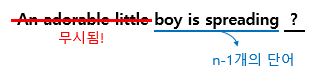

In [2]:
Image("./scr/10-02 n-gram.png")

$P(w\text{|boy is spreading}) = \frac{\text{count(boy is spreading}\ w)}{\text{count(boy is spreading)}}$

#### 3) N-gram Language Model의 한계

전체 문장을 고려한 언어 모델보다는 정확도가 떨어질 수밖에 없다.

- **희소 문제(Sparsity Problem)**  
    여전히 희소 문제가 존재한다.
- **n을 선택하는 것은 trade-off 문제.**
    n을 크게 선택한다 -> 희소 문제 발생
    희소 문제 축소 -> n을 작게 선택해야 한다.  
    **n은 최대 5를 넘게 잡아서는 안된다고 권장되고 있다.**